In [304]:
!pip install tensorflow

In [ ]:
!pip install keras

In [305]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importar las librerias**

* **numpy** -> Para cálculos matemáticos
* **sklearn** -> Libreria para aprendizaje automático y modelado de datos
* **tensorflow** -> Permite construir y entrenar redes neuronales



In [306]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## **Descripción del Data Set**

El conjunto de datos contiene columnas como: "dirección del viento", "velocidad del viento", "humedad" y temperatura. El parámetro de respuesta que se va a predecir es: "Radiación_solar". Contiene mediciones de los últimos 4 meses y hay que predecir el nivel de radiación solar.


In [307]:
#Cargar los datos
ruta = '/content/drive/MyDrive/Colab Notebooks/Modelo predictivo/SolarPrediction.csv'
solar_data = pd.read_csv(ruta)

solar_data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [308]:
solar_data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [309]:
#Seleccionar las caracteristicas y variables objetivo
caracteristicas = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Time']

X = solar_data[caracteristicas].values
y = solar_data['Radiation'].values

**Normalización de las caracteristicas**
Ajustar las escalas de los datos para que sean relacionables

## Análisis exploratorio de datos

Se evaluarán los datos de:
* La Distribución de la Radiación Solar.
* La relación entre la radición solar y las variables climáticas.
* La variación de la radiación solar según la hora y el mes


In [310]:
#Librerias para hacer las gráficas
#matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

### Distribución de la radiación solar

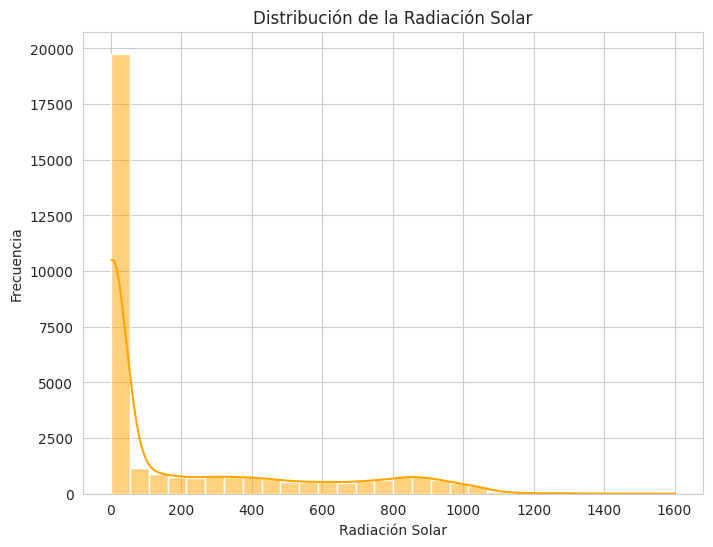

In [311]:
#Estilos de las graficas
sns.set_style('whitegrid')

#1 Distribución de la radiación solar
plt.figure(figsize=(8,6))
sns.histplot(solar_data['Radiation'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Radiación Solar')
plt.xlabel('Radiación Solar')
plt.ylabel('Frecuencia')
plt.show()

## Análisis
- Los valores de radiación alta son los menos comunes en el data set, es probable que a lo largo del día la radiación solar se mantenga baja.

### Relación entre radiación solar y variables climáticas

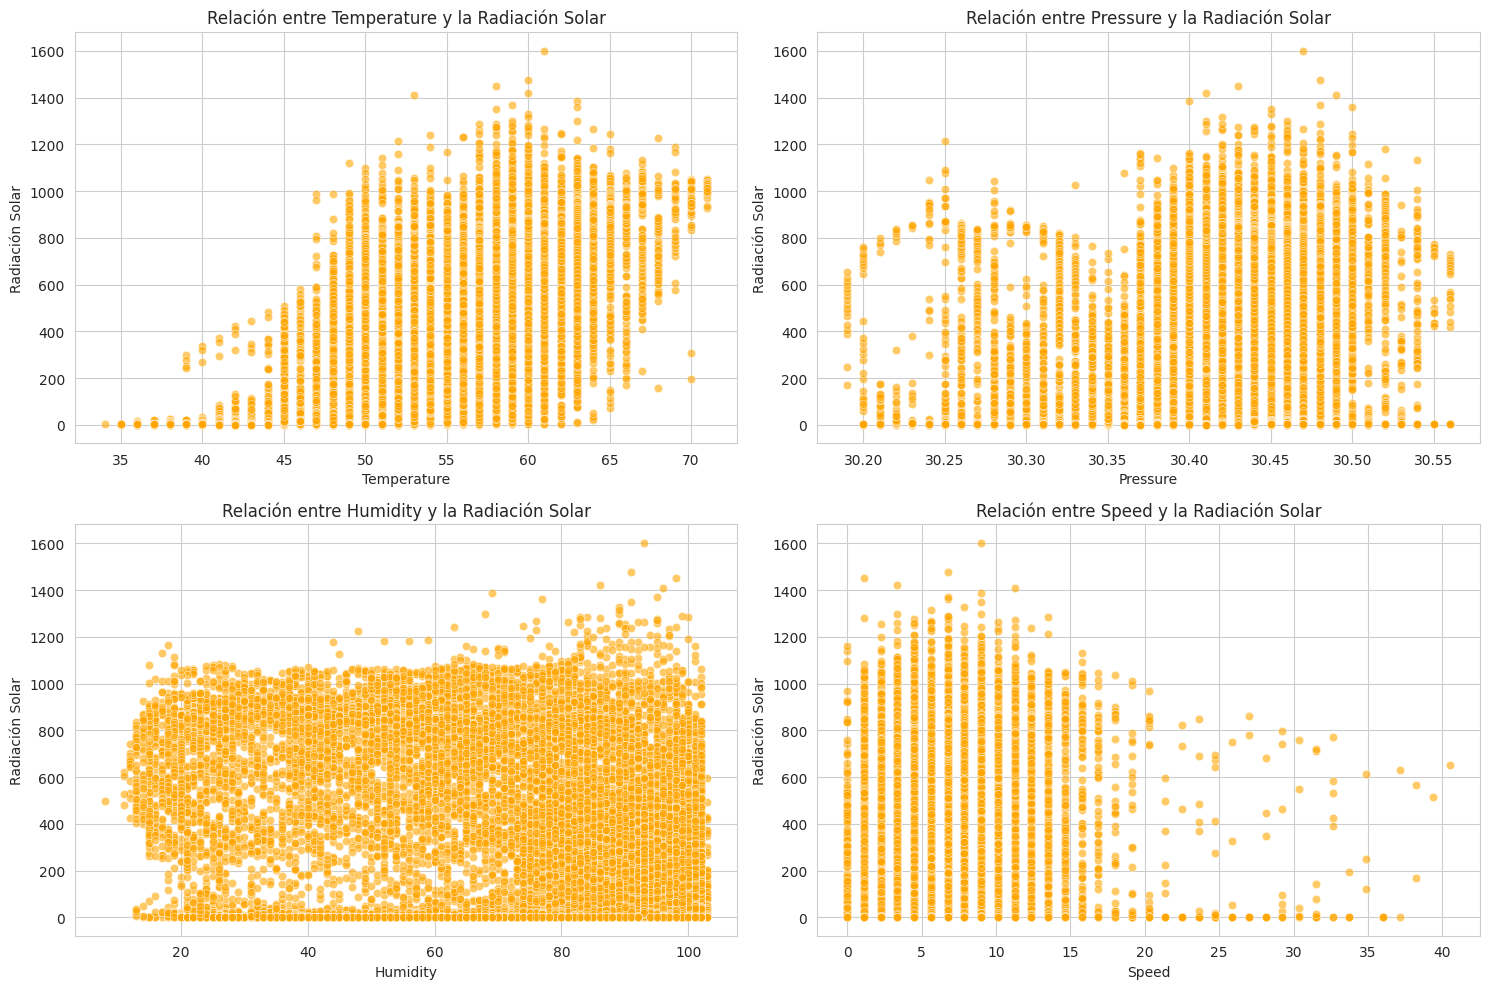

In [312]:
variables_climaticas = ['Temperature', 'Pressure', 'Humidity', 'Speed']

#2 Relación entre la radiación solar y las variables climáticas
#Desarrollar la gráfica
fig,axes = plt.subplots(2,2, figsize=(15,10))
#Realizar la gráfica por cada uno de los datos del data frame
for var, ax in zip(variables_climaticas, axes.flatten()):
  sns.scatterplot(x=var, y='Radiation', data=solar_data, ax=ax, color='orange', alpha=0.6)
  ax.set_title(f'Relación entre {var} y la Radiación Solar')
  ax.set_xlabel(var)
  ax.set_ylabel('Radiación Solar')

plt.tight_layout()
plt.show()


- Un factor determinante es que a medida que aumenta la radiación solar, aumenta la humedad.
- A menor velocidad del viento, se identifica mayor radiación solar.
- La relación entre la temperatura y la presión con respecto a la radiación solar, genera datos dispersos.
-A mayor temperatura se observa mayor radiación solar,pero los datos presentan una gran dispersión, esto sugiere que la temperatura no es principal factor en la radiación solar.
- No hay relación significativa entre la radiación solar y la presión (No se presentan datos significativos)

## Definir el modelo de Machine Learning

In [313]:
model = None
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=14))
#Reducir el riesgo de sobreajusto ->Desactiva el porcentaje de neuronas en una capa
model.add(Dropout(0.33))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))


model.add(Dense(16, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))

model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                     │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [314]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [315]:
#Crear las variables para el entrenamiento

X = solar_data[['Temperature', 'Humidity', 'WindDirection(Degrees)', 'Speed']]
y = solar_data['Radiation']



In [316]:
#Entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Random Forest Regressor,  combina multiples arboles para mejorar la precisión de una desición, y reducir el riesgo de sobreajuste


**Random Forest Regresor**
1. Genera un conjunto de árboles de desición
2. Cada árbol genera un subconjunto aleatorio del conjunto de datos original
3. Para cada nodo se hace un subconjunto.


El resultado final es el promedio de las predicciones de todos los árboles

In [317]:
#Usar el modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [350]:
y_test_predict = model.predict(X_test)
y_train_test = model.predict(X_train)

# Buscar las métricas del modelo predictivo


In [319]:
from sklearn.metrics import r2_score

In [323]:
metricas_entrenamiento = r2_score(y_train, y_train_test)
metricas_prueba = r2_score(y_test, y_test_predict)
puntaje_prediccion_entrenamiento = model.score(X_train, y_train)


puntaje_prediccion = model.score(X_test, y_test)

print(f'Puntaje de predicción: {puntaje_prediccion}')
print(f'Puntaje de predicción de entrenamiento: {puntaje_prediccion_entrenamiento}')
print(f'Metricas de entrenamiento: {metricas_entrenamiento}')



Puntaje de predicción: 0.7033645228086258
Puntaje de predicción de entrenamiento: 0.9560437033349277
Metricas de entrenamiento: 0.9560437033349277


Predecir la radiación

In [325]:
#Añadir una nueva columna con la predicción de la radiación solar
solar_data['RadiationPrediction'] = model.predict(X)

In [351]:
solar_data

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,RadiationPrediction
Data,,,,,,,,,,,
2016-09-29,1475229326,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9.4355
2016-09-29,1475229023,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,33.3251
2016-09-29,1475228726,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1.3792
2016-09-29,1475228421,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1.5461
2016-09-29,1475228124,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,7.4807
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-01,1480587604,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,1.2168
2016-12-01,1480587301,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2.2509
2016-12-01,1480587001,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,12.4628


In [352]:
solar_data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,RadiationPrediction
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,208.416006
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,284.666444
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,1.162700
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,4.374725
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,38.232050
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,366.157750
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1275.728800


Gráficas de la predicción

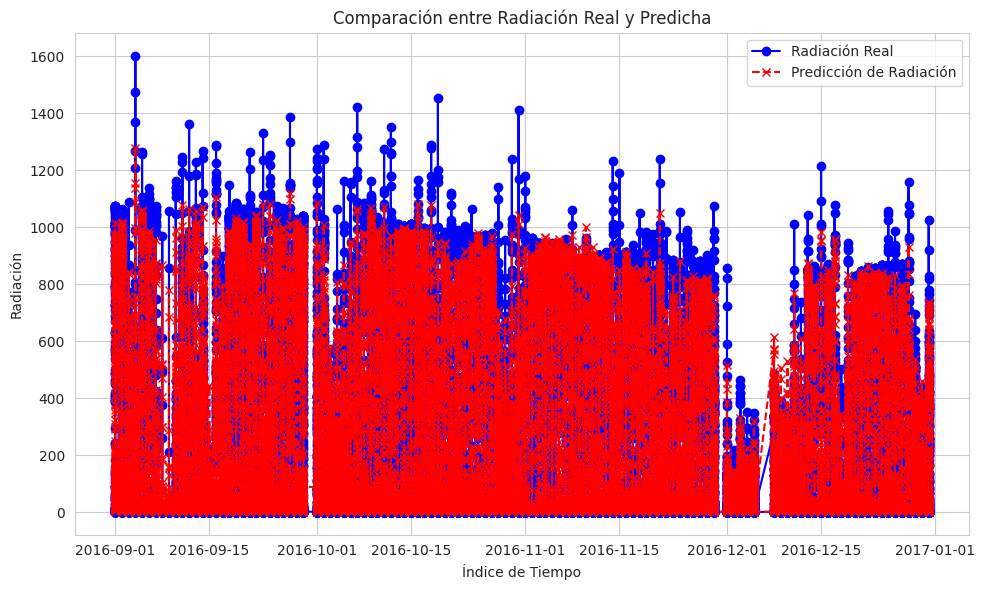

In [353]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'solar_data' es el DataFrame que contiene la columna 'Radiation' y 'RadiationPrediction'

# Graficar los valores reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(solar_data['Radiation'], label='Radiación Real', marker='o', linestyle='-', color='b')
plt.plot(solar_data['RadiationPrediction'], label='Predicción de Radiación', linestyle='--', marker='x', color='r')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Radiación')
plt.title('Comparación entre Radiación Real y Predicha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


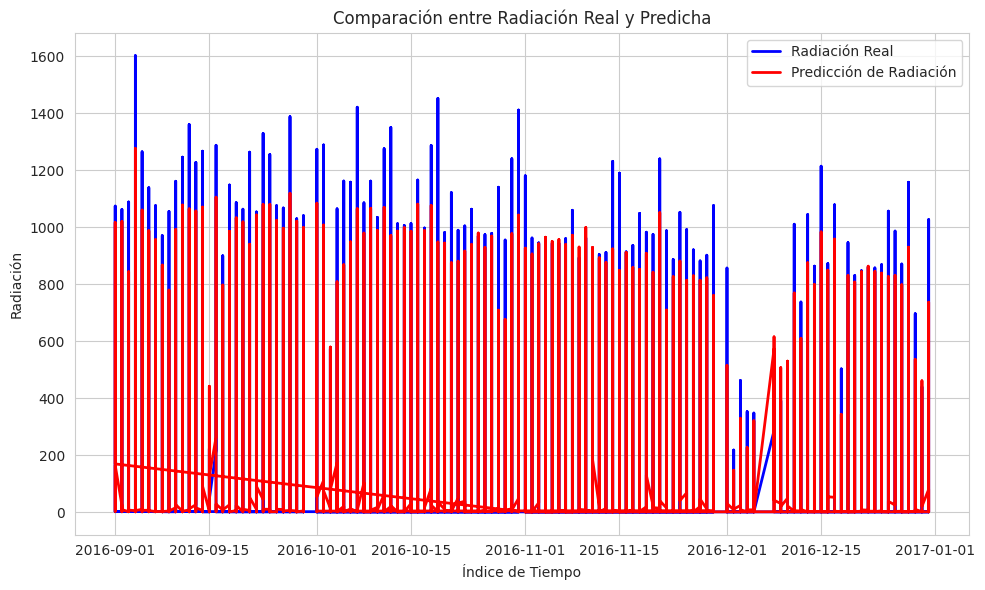

In [354]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'solar_data' es el DataFrame que contiene la columna 'Radiation' y 'RadiationPrediction'

# Graficar los valores reales y predichos con curvas suaves
plt.figure(figsize=(10, 6))

# Usamos 'linestyle' para definir el estilo de la curva
plt.plot(solar_data['Radiation'], label='Radiación Real', color='b', linestyle='-', linewidth=2)
plt.plot(solar_data['RadiationPrediction'], label='Predicción de Radiación', color='r', linestyle='-', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Índice de Tiempo')
plt.ylabel('Radiación')
plt.title('Comparación entre Radiación Real y Predicha')
plt.legend()

# Mejorar visualización
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()


# **Conclusión**

A partir del modelo, y los datos obtenidos en el archivo .csv, podemos decir que el modelo predijo que la radiación sería mucho más baja de lo que se presentó en los datos, esto se puede debr a un desajuste corto en la predicción de los datos o en la limpieza de los mismos.

Sin embargo vemos que en ambos casos los datos siguen la misma linea de tendencia, despreciando las magnitudes de estos, por supuesto, se sigue la tendencia, pero hay un gran desfase en los datos.

In [335]:
print(solar_data.index)


RangeIndex(start=0, stop=32686, step=1)


In [338]:
solar_data['Data'] = pd.to_datetime(solar_data['Data'])  # Convierte la columna de fecha a datetime
solar_data.set_index('Data', inplace=True)  # Establece el índice


In [345]:
print(X_train.columns)


Index(['Temperature', 'Humidity', 'WindDirection(Degrees)', 'Speed'], dtype='object')


## Conceptos y entrenamiento de la red neuronal

**Dense** -> Capa conectada en el red neuronal, cada neurona de la red, está conectada a una de la capa anterior.

**Dropout** -> Apaga temporalmente las neuronas en una capa para evitar el sobreajuste, para aprender patrones más generalizables

En este caso, cada capa tendrá 64 neuronas, y se conectan a la capa anterior.

**ReLU (Rectified Linear Unit)**: Es una función de activación de redes neuronales, para valores positivos y negativos. Negativo será categorizado como 0 y positivo como 1

**Capas del Modelo**

**Primera capa**: 64 neuronas, activación ReLU, con la forma de entrada definida como (X_train.shape[1],), que será el número de características en los datos.

**Segunda capa:** 32 neuronas con activación ReLU.

**Tercera capa:** 16 neuronas con activación ReLU.

**Capa de salida:** 1 neurona sin activación, que es común para tareas de regresión (predicción de valores continuos).